# Machine Learning - Exercise 9

# KNN

## Import

Import libraries that contains the implementations of the functions used in the rest of the program.



In [1]:
import random
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

print("Libraries imported.")

Libraries imported.


# Data set


Data-generation function

In [2]:
# Param: n=size of data set, outliers=True/False
def generateData(n, outliers=False):
    X = np.ndarray((n,2))
    t = np.ndarray((n,1))
    n1 = int(n*0.5)

    # define random centers of distributions far away

    for i in range(0,n1):
        X[i,:] = np.random.normal((2.0,8.5),0.8,size=(1,2))
        t[i] = -1
    for i in range(n1,n):
        X[i,:] = np.random.normal((7.0,5.0),0.5,size=(1,2))
        t[i] = 1

    if (outliers):
        no=int(n*0.9)
        for i in range (no,n):
            X[i,:] = np.random.normal((4.0,7.0),0.5,size=(1,2))
            if random.random() > 0.5:
                t[i] = 1
            else:
              t[i] = -1

    return [X,t]

Generate n data points with/without outliers

In [3]:
n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

# print specs
print("Input shape: %s" %str(X.shape))
print("Output shape: %s" %str(t.shape))
print("Number of attributes/features: %d" %(X.shape[1]))
print("Number of classes: %d" %(len(np.unique(t))))
print("Number of samples: %d" %(X.shape[0]))

# show an example
id = random.randrange(0,X.shape[0])

print("Example:")
print("x%d = %r" %(id,X[id]))
print("y%d = %r" %(id,t[id]))

Input shape: (100, 2)
Output shape: (100, 1)
Number of attributes/features: 2
Number of classes: 2
Number of samples: 100
Example:
x1 = array([2.2263828 , 7.29496423])
y1 = array([-1.])


# Plot functions

In [4]:
# Plot data
def plotData(X,t,XNr=None,XNg=None,label='Data'):
    Xr = np.ndarray((0,2))
    Xg = np.ndarray((0,2))
    for i in range(0,len(X)):
        if (t[i][0]==1):
            Xr = np.vstack([Xr, [X[i,0],X[i,1]]])
        else:
            Xg = np.vstack([Xg, [X[i,0],X[i,1]]])

    if (not XNr is None):
        plt.plot(XNr[:,0],XNr[:,1],'.', color='#FFAAAA')
    if (not XNg is None):
        plt.plot(XNg[:,0],XNg[:,1],'.', color='#AAFFAA')

    plt.plot(Xr[:,0],Xr[:,1],'ro')
    plt.plot(Xg[:,0],Xg[:,1],'go')
    plt.axis([0,10,0,10])
    plt.title(label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Plot results of a solution
def plotResult(X, t, clf, label):
    XNr = np.ndarray((0,2))
    XNg = np.ndarray((0,2))

    for u in np.arange(0,10,0.1):
        for v in np.arange(0,10,0.1):
            xn = np.array([[u, v]])
            yn = clf.predict(xn)
            if (yn<0):
                XNg = np.vstack([XNg, [u,v]])
            else:
                XNr = np.vstack([XNr, [u,v]])

    plotData(X,t,XNr,XNg,label)

# Draw the dataset

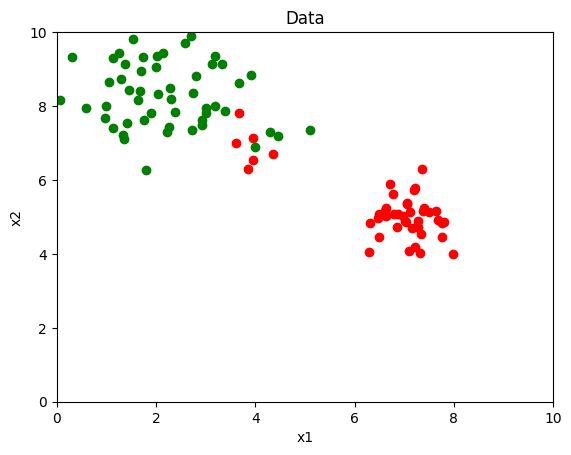

In [5]:
plotData(X,t)

# Model

## Training KNN classifier

More details on KNN KNeighborsClassifier method are available at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
t_flat = t.ravel()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, t_flat);

## Evaluate model


# Visualize results

Define visualization functions

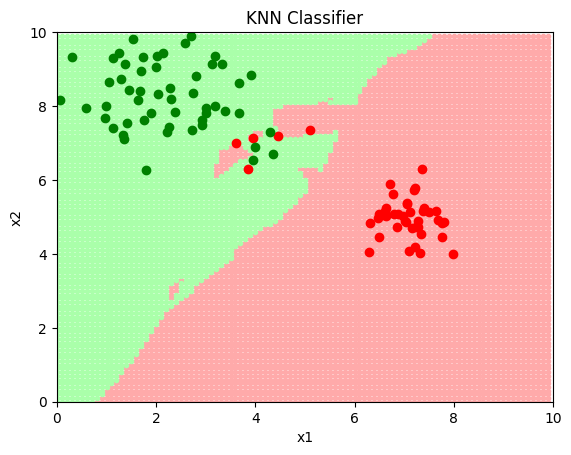

In [7]:
# show results
plotResult(X,t,knn,'KNN Classifier')

# Home Exercises

Test robustness to outliers and to noise.
Generate a test set from the same distributions used to generate the training set.


**Question 1**

Compare the performance of KNN in the presence of outliers. How does it change by changing the value of n_neighbours?

**Question 2**

Compare the performance using different values for the n_neighbors attribute in
presence of noisy labels. Generate a data set with noisy data (assign random labels to a subset of the dataset).
Plot performace (e.g., accuracy) over percentage of random samples, considering percentage values 0.0, 0.25, 0.5, 0.75, 1.
